In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('placement.csv')

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
128,6.76,25.0,0
459,6.62,79.0,1
840,6.89,22.0,1
835,6.67,65.0,1
906,7.56,34.0,1


C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_7624\3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_7624\3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar

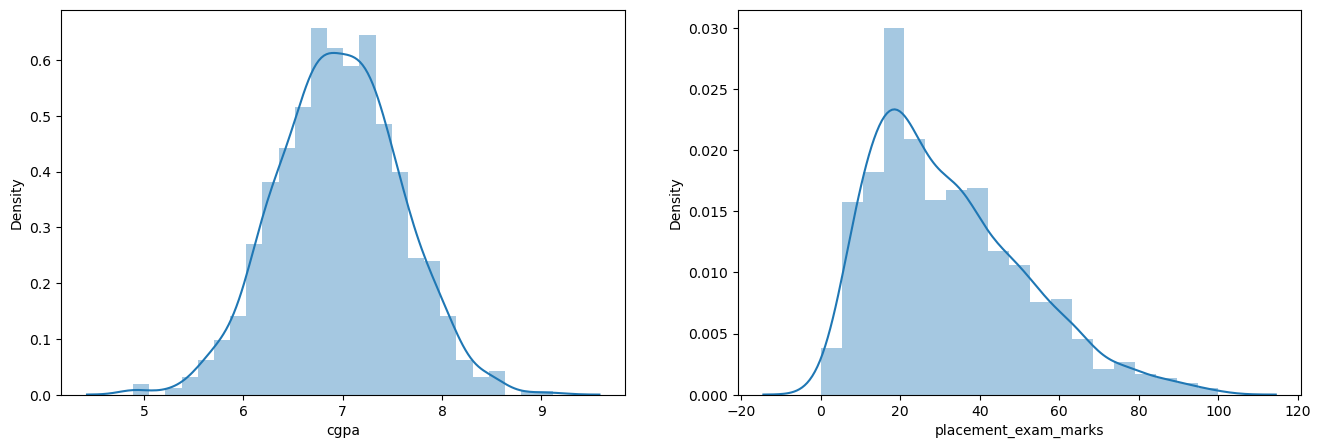

In [9]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

<Axes: >

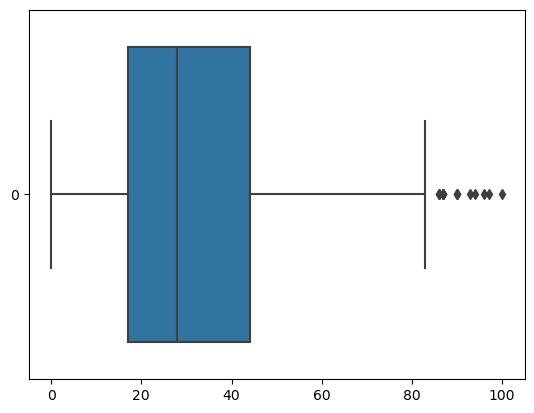

In [13]:
sns.boxplot(df['placement_exam_marks'],orient='h')

## find IQR

In [21]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [22]:
IQR = percentile75 - percentile25

In [23]:
upperlimit = percentile75 + 1.5 * IQR
lowerlimit = percentile25 - 1.5 * IQR

In [24]:
upperlimit,lowerlimit

(84.5, -23.5)

In [26]:
df[df['placement_exam_marks'] > upperlimit].shape

(15, 3)

## Trimming

In [40]:
new_df = df[(df['placement_exam_marks'] < upperlimit) &  (df['placement_exam_marks'] > lowerlimit)]

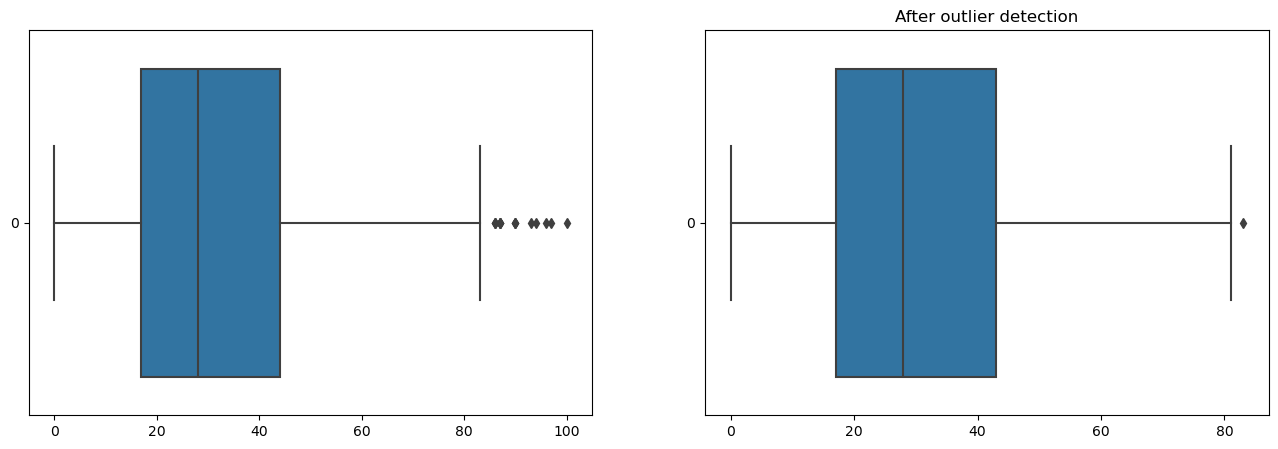

In [29]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['placement_exam_marks'],orient='h')

plt.subplot(1,2,2)
sns.boxplot(new_df['placement_exam_marks'],orient='h')
plt.title('After outlier detection')

plt.show()

## Capping 

In [50]:
new_df_cap = df.copy()
new_df_cap.shape

(1000, 3)

In [51]:

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upperlimit,
    upperlimit,
    np.where(
        new_df_cap['placement_exam_marks'] < lowerlimit,
        lowerlimit,
        new_df_cap['placement_exam_marks']
    )
)

In [52]:
new_df_cap.shape

(1000, 3)

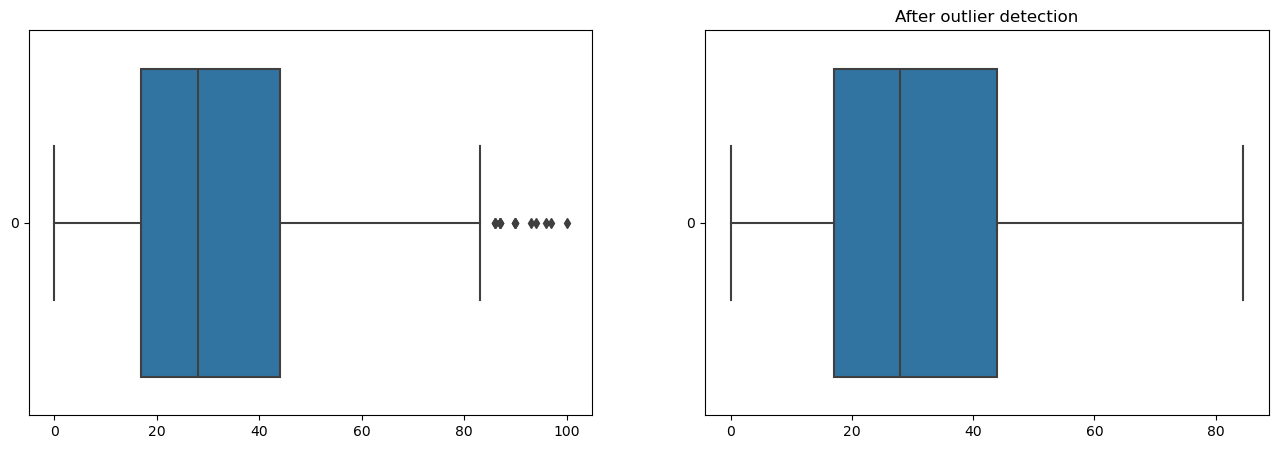

In [53]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['placement_exam_marks'],orient='h')

plt.subplot(1,2,2)
sns.boxplot(new_df_cap['placement_exam_marks'],orient='h')
plt.title('After outlier detection')

plt.show()